In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

import itertools

import astropy
from astropy.table import Table

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve

from astroML.utils import split_samples, completeness_contamination

import warnings
warnings.filterwarnings("ignore")
import h5py

In [2]:
#per leggere i dati = uso indirizzo già scritto in path+il nome del file
path='./galaxyquasar.csv'
data=Table.read(path)
print(data[:5])

   u        g        r        i        z     class      z1        zerr    
-------- -------- -------- -------- -------- ------ --------- ------------
18.97213 18.53676  18.5828 18.34936 18.29215    QSO 0.5228189 0.0001547483
19.24592 17.47646 16.47817 16.04472 15.68851 GALAXY 0.1228459 2.816076e-05
19.43536 17.70268 16.91565 16.58327 16.39128 GALAXY       0.0          0.0
19.31626 18.18312 17.39591 16.94549 16.65395 GALAXY 0.1474355 9.310701e-06
19.28828 19.11188 18.88937 18.80013 18.49183    QSO  2.011455 0.0006307968


In [3]:
#saving data (none of them has nan)
u=np.array(data['u'])
g=np.array(data['g'])
r=np.array(data['r'])
i=np.array(data['i'])
z=np.array(data['z'])

ug=u-g
gr=g-r
ri=r-i
iz=i-z
color=np.array([ug,gr,ri,iz])

#saving the classes => galaxy = 0, quasar = 1
label_class=np.array([data['class']=='QSO']).astype(int)

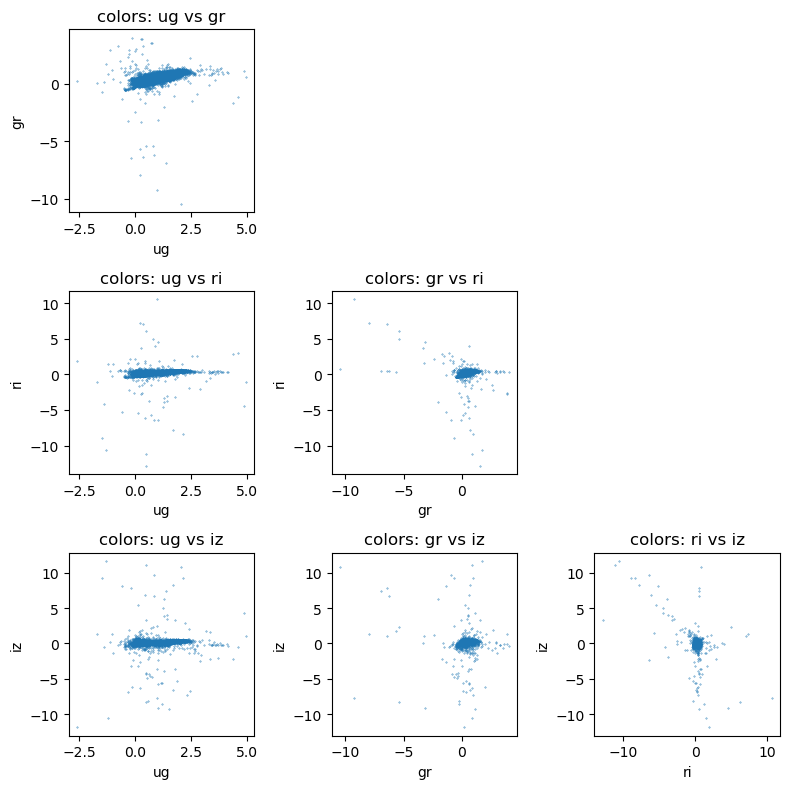

In [4]:
# Create subplots
labels=['ug','gr','ri','iz']
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Plot scatter plot
axes[0][0].scatter(color[0],color[1], s=0.1)
axes[0][0].title.set_text('colors: '+str(labels[0])+' vs '+str(labels[1]))
axes[0][0].set_xlabel(str(labels[0]))
axes[0][0].set_ylabel(str(labels[1]))
axes[0][1].axis("off")
axes[0][2].axis("off")
axes[1][0].scatter(color[0],color[2], s=0.1)
axes[1][0].title.set_text('colors: '+str(labels[0])+' vs '+str(labels[2]))
axes[1][0].set_xlabel(str(labels[0]))
axes[1][0].set_ylabel(str(labels[2]))
axes[1][1].scatter(color[1],color[2], s=0.1)
axes[1][1].title.set_text('colors: '+str(labels[1])+' vs '+str(labels[2]))
axes[1][1].set_xlabel(str(labels[1]))
axes[1][1].set_ylabel(str(labels[2]))
axes[1][2].axis("off")
axes[2][0].scatter(color[0],color[3], s=0.1)
axes[2][0].title.set_text('colors: '+str(labels[0])+' vs '+str(labels[3]))
axes[2][0].set_xlabel(str(labels[0]))
axes[2][0].set_ylabel(str(labels[3]))
axes[2][1].scatter(color[1],color[3], s=0.1)
axes[2][1].title.set_text('colors: '+str(labels[1])+' vs '+str(labels[3]))
axes[2][1].set_xlabel(str(labels[1]))
axes[2][1].set_ylabel(str(labels[3]))
axes[2][2].scatter(color[2],color[3], s=0.1)
axes[2][2].title.set_text('colors: '+str(labels[2])+' vs '+str(labels[3]))
axes[2][2].set_xlabel(str(labels[2]))
axes[2][2].set_ylabel(str(labels[3]))

plt.tight_layout()
plt.show()

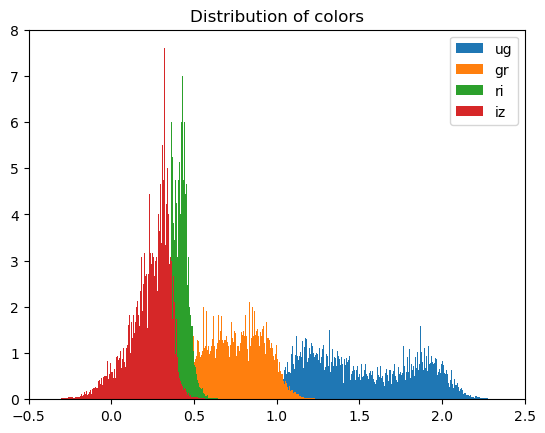

In [5]:
#histogram of the distribution of colors
N_bins=20
bins_set_ug=np.append(np.sort(ug)[::N_bins], np.max(ug))
bins_set_gr=np.append(np.sort(gr)[::N_bins], np.max(gr))
bins_set_ri=np.append(np.sort(ri)[::N_bins], np.max(ri))
bins_set_iz=np.append(np.sort(iz)[::N_bins], np.max(iz))

plt.hist(ug, bins=bins_set_ug, density=True, label='ug')
plt.hist(gr, bins=bins_set_gr, density=True, label='gr')
plt.hist(ri, bins=bins_set_ri, density=True, label='ri')
plt.hist(iz, bins=bins_set_iz, density=True, label='iz')
plt.title('Distribution of colors')
plt.legend()
plt.xlim(-0.5,2.5)
plt.ylim(0,8)
plt.show()

In [6]:
#reshape of the data = normalizing to mean = 0 and variance = 1
data_norm=np.zeros((len(color),len(color[0])))

for i in range(len(color[0])):
    data_norm[:,i]=((color[:,i]-np.mean(color[:,i]))/(np.std(color[:,i])))

print('Data normalized:\n', data_norm[0:3])

Data normalized:
 [[ 1.45076091  1.55671022  1.61254597 ...  1.69936364  1.58128505
   1.6783116 ]
 [-1.18102735  0.19268569  0.04316563 ... -0.25689819  0.06527507
  -0.18325505]
 [ 0.34684324 -0.80638795 -0.7113617  ... -0.66731965 -0.55899174
  -0.62085796]]


In [7]:
#dividing in train and test for neural network
x_train, x_test, y_train, y_test = train_test_split(data_norm.T, label_class.ravel(), test_size=0.3, random_state=42)

In [8]:
#decision tree for classification
clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(5), #n. of neurons in one hidden layer 
                                           #(if more layers = (n. neurons layer 1, n. neurons layer 2))
                                           activation='relu', #activation function (relu= Rectified Linear Unit)
                                           solver='adam', #optimization algorithm 
                                           alpha=0, #L2 regularization = if 0 => no regularization (risk overfit)
                                           learning_rate_init=0.001, #initial learning rate
                                           max_iter=200) #n. epochs

clf.fit(x_train, y_train)
y_prob=clf.predict_proba(x_test)[:,1]

#ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob)

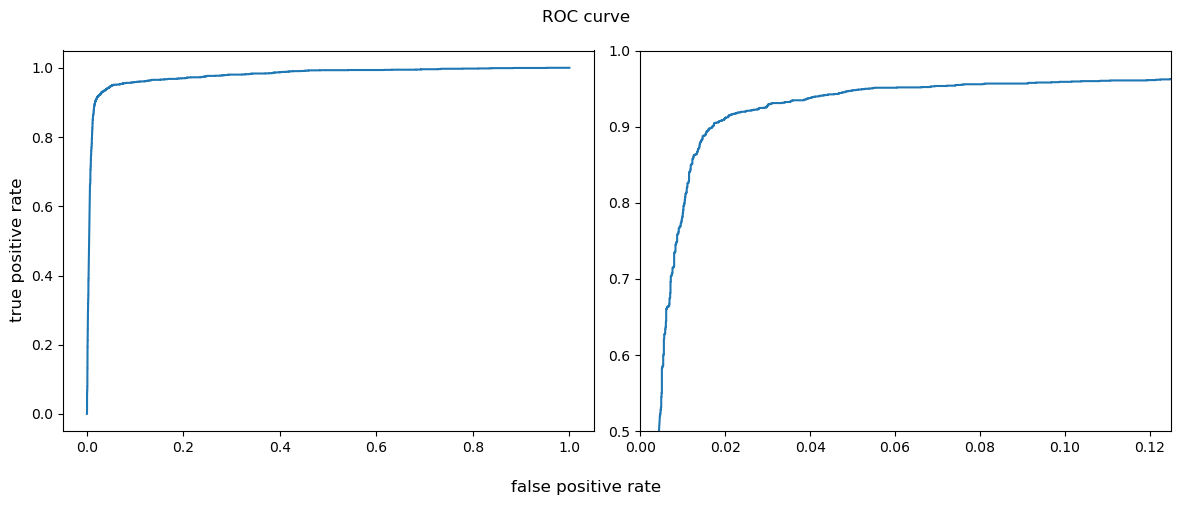

In [9]:
#Plot ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(fpr, tpr)

#Plot ROC curve (zoomed)
axes[1].plot(fpr, tpr)
axes[1].set_xlim(0,0.125)
axes[1].set_ylim(0.5,1)

fig.supxlabel('false positive rate')
fig.supylabel('true positive rate')
fig.suptitle('ROC curve')

plt.tight_layout()

fig.show()

In [10]:
#Trying to use different activation functions on the data
n_activation=['relu', 'logistic', 'tanh']

fpr_activation, tpr_activation, thresh_activation, score_tot=[],[],[], []
for n in n_activation:
    clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(5),
                                           activation=n, #trying different activation functions
                                           solver='adam',
                                           alpha=0, 
                                           learning_rate_init=0.001,
                                           max_iter=200)
    clf.fit(x_train, y_train)
    y_prob=clf.predict_proba(x_test)[:,1]
    #score for the trees
    score_tot.append(clf.score(x_test, y_test))
    
    #ROC curve
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    fpr_activation.append(fpr)
    tpr_activation.append(tpr)
    thresh_activation.append(thresh)

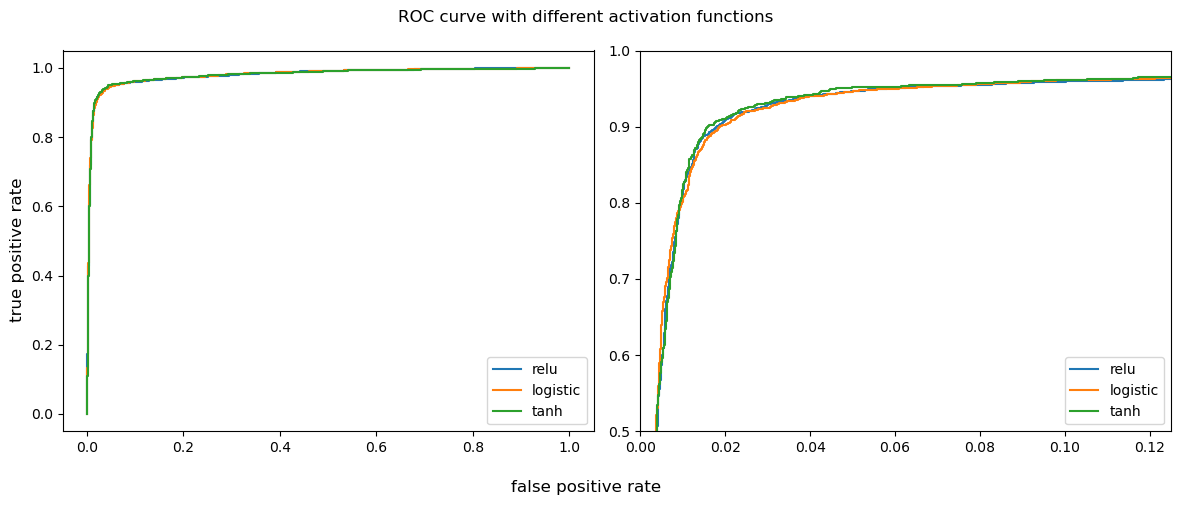

In [11]:
#Plot ROC curve for the different activation functions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i in range(len(n_activation)):
    axes[0].plot(fpr_activation[i], tpr_activation[i], label=str(n_activation[i]))

axes[0].legend()

#Plot ROC curve (zoomed)
for i in range(len(n_activation)):
    axes[1].plot(fpr_activation[i], tpr_activation[i], label=str(n_activation[i]))
axes[1].set_xlim(0,0.125)
axes[1].set_ylim(0.5,1)
axes[1].legend()

fig.supxlabel('false positive rate')
fig.supylabel('true positive rate')
fig.suptitle('ROC curve with different activation functions')

plt.tight_layout()

fig.show()

In [12]:
#.score = correct predictions of the tree
print('Mean scores for the activation function:')
print(n_activation[0], ': \t\t', round(score_tot[0],4))
print(n_activation[1], ': \t', round(score_tot[1],4))
print(n_activation[2], ': \t\t', round(score_tot[2],4))

Mean scores for the activation function:
relu : 		 0.9689
logistic : 	 0.9691
tanh : 		 0.9718


In [13]:
#score done with classification little more than this => better simpler model

Activation= relu 0.16419928679105414 0.1658070087318044
Activation= logistic 0.16090232087118478 0.16215159662518724
Activation= tanh 0.15591925385155403 0.15780960265050348
Best tanh 0.15780960265050348


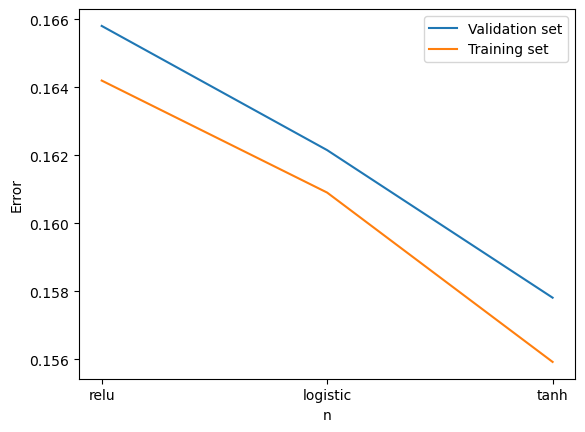

In [14]:
#CV on the activation functions
n_activation=['relu', 'logistic', 'tanh']

err_train_tot, err_test_tot= [], []
for n in n_activation:
    clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(5),
                                           activation=n, #trying different activation functions
                                           solver='adam',
                                           alpha=0, 
                                           learning_rate_init=0.001,
                                           max_iter=200)
    clf.fit(x_train, y_train)
    
    y_prob=clf.predict_proba(x_test)[:,1]
    
    error_train_tot = np.sqrt( np.sum((y_train-clf.predict_proba(x_train)[:,1] )**2) / len(x_train) )
    error_validation_tot = np.sqrt( np.sum((y_test-clf.predict_proba(x_test)[:,1] )**2) / len(x_test) )

    #value of error in train and test
    print("Activation=",n, error_train_tot, error_validation_tot)
    err_train_tot.append(error_train_tot)
    err_test_tot.append(error_validation_tot)

plt.plot(n_activation,err_test_tot, label='Validation set')
plt.plot(n_activation,err_train_tot, label='Training set')

plt.xlabel('n')
plt.ylabel('Error')
plt.legend()

#find the best number of neighbors from minimum of test
best_activation=n_activation[np.argmin(err_test_tot)]
print("Best", best_activation, min(err_test_tot))

plt.show()

In [15]:
#trying to see evolution of ROC with different numbers of epochs 
n_epochs=np.arange(50,600,50)

fpr_epochs, tpr_epochs, thresh_epochs, score_tot_epochs=[],[],[], []
for n in n_epochs:
    clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(5),
                                           activation='tanh', 
                                           solver='adam',
                                           alpha=0, 
                                           learning_rate_init=0.00001,
                                           max_iter=n) #trying different numbes of epochs
    clf.fit(x_train, y_train)
    y_prob=clf.predict_proba(x_test)[:,1]
    #score for the trees
    score_tot_epochs.append(clf.score(x_test, y_test))
    
    #ROC curve
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    fpr_epochs.append(fpr)
    tpr_epochs.append(tpr)
    thresh_epochs.append(thresh)

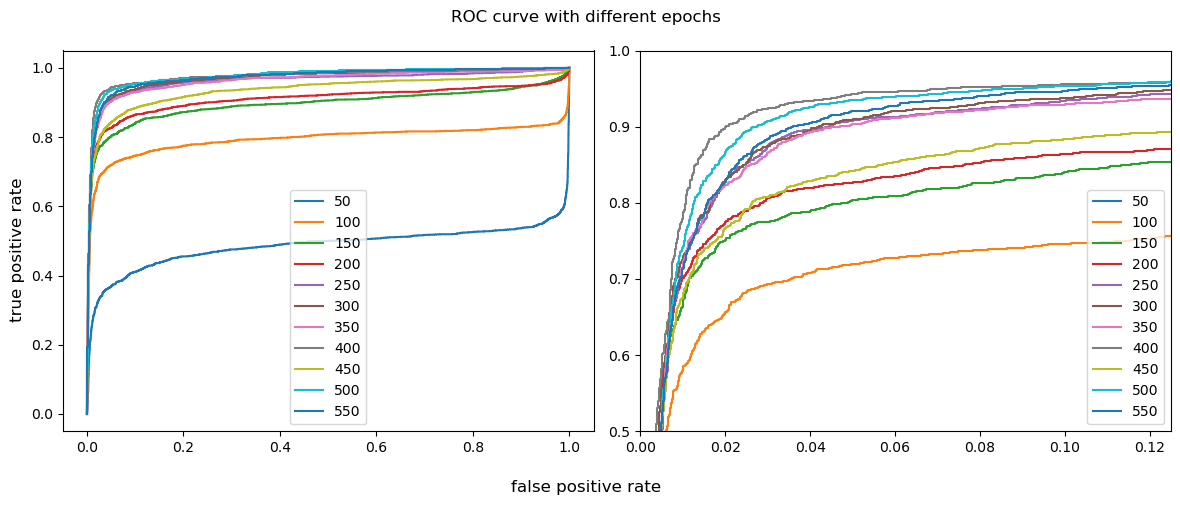

In [16]:
#Plot ROC curve for the different values of epochs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i in range(len(n_epochs)):
    axes[0].plot(fpr_epochs[i], tpr_epochs[i], label=str(n_epochs[i]))

axes[0].legend()

#Plot ROC curve (zoomed)
for i in range(len(n_epochs)):
    axes[1].plot(fpr_epochs[i], tpr_epochs[i], label=str(n_epochs[i]))
axes[1].set_xlim(0,0.125)
axes[1].set_ylim(0.5,1)
axes[1].legend()

fig.supxlabel('false positive rate')
fig.supylabel('true positive rate')
fig.suptitle('ROC curve with different epochs')

plt.tight_layout()

fig.show()